# Loan Application Status Prediction

# Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 


Independent Variables:
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.
You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 


In [80]:
#IMPORTING THE REQUIRED LIBRARIES

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import joblib

In [2]:
#LOADING THE DATASET
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# EXPLORATORY DATA ANALYSIS

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

In [4]:
df.info()     #getting the info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


There are 8 columns having object as dtype, 4 columns having float64 as dtype and 1 column having int64 as dtype.

In [5]:
df.drop("Loan_ID",axis=1, inplace=True)     

Dropping the Loan_ID column as it will not serve any useful purpose.

In [6]:
df.describe().T    #describing the dataset to have a look at the numerical datatype columns.

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [7]:
df.isna().sum()     #checking for the presence of null values in the dataset.

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
print(f"rows and columns before dropping duplicates", df.shape)
df.drop_duplicates(inplace=True)
print(f"rows and columns after dropping duplicates", df.shape)

rows and columns before dropping duplicates (614, 12)
rows and columns after dropping duplicates (614, 12)


There are no duplicate data present in our dataset.

In [9]:
df.nunique().to_frame("Unique Values")      #looking for the unique values in the dataset.

,Unique Values
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10
Credit_History,2


# FILLING THE MISSING VALUES USING MEAN AND MODE

In [12]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [13]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Successfully filled the missing data.

# VISUALIZATION

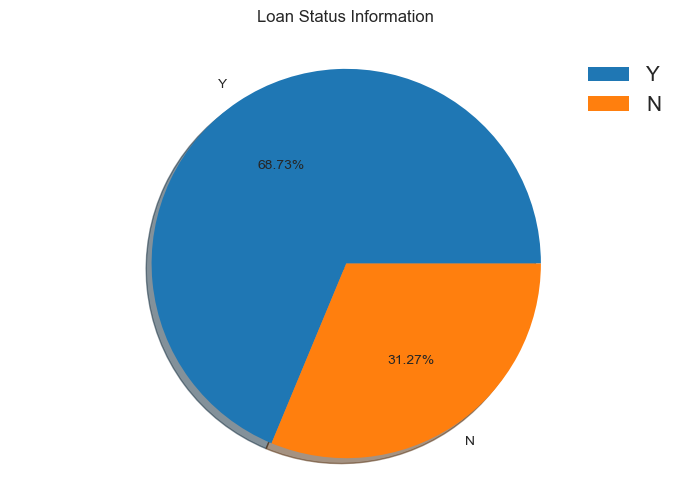

In [14]:
plt.style.use('seaborn-white')
plt.figure(figsize=(7,5))
plt.pie(df['Loan_Status'].value_counts(), labels=df['Loan_Status'].value_counts().index, shadow=True, autopct='%1.2f%%')
plt.title('Loan Status Information\n')
plt.legend(prop={'size':15})
plt.axis('equal')
plt.tight_layout()
plt.show()

The above pie chart above depicts that 68.73% of loan are approved while 31.27% of loan disapproved.

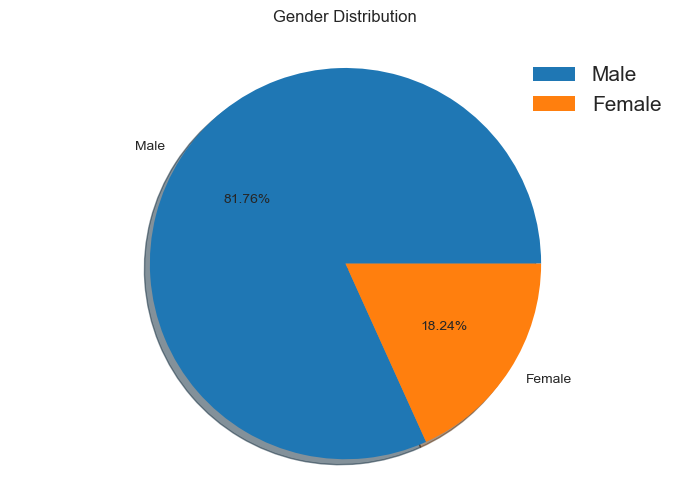

In [15]:
plt.style.use('seaborn-white')
plt.figure(figsize=(7,5))
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, shadow=True, autopct='%1.2f%%')
plt.title('Gender Distribution\n')
plt.legend(prop={'size':15})
plt.axis('equal')
plt.tight_layout()
plt.show()

In the pie chart above we can see the percentage of males cover 81.76% of the rows in Gender column.

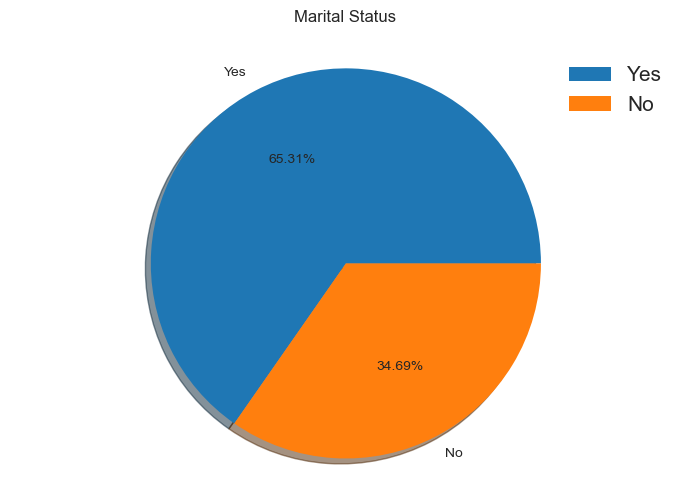

In [16]:
plt.style.use('seaborn-white')
plt.figure(figsize=(7,5))
plt.pie(df['Married'].value_counts(), labels=df['Married'].value_counts().index, shadow=True, autopct='%1.2f%%')
plt.title('Marital Status\n')
plt.legend(prop={'size':15})
plt.axis('equal')
plt.tight_layout()
plt.show()

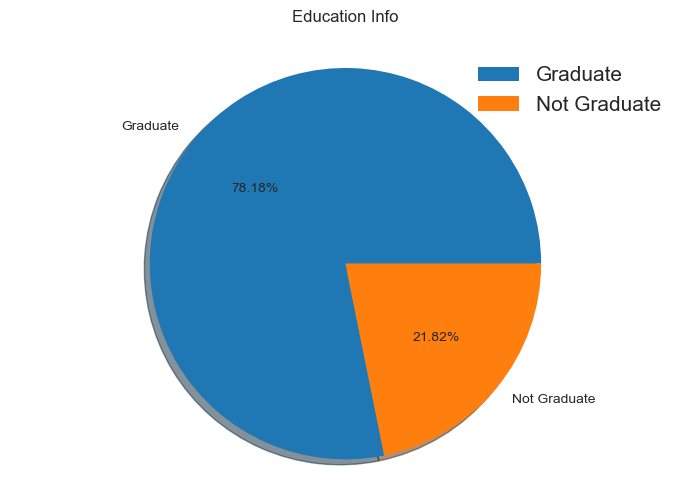

In [17]:
plt.style.use('seaborn-white')
plt.figure(figsize=(7,5))
plt.pie(df['Education'].value_counts(), labels=df['Education'].value_counts().index, shadow=True, autopct='%1.2f%%')
plt.title('Education Info\n')
plt.legend(prop={'size':15})
plt.axis('equal')
plt.tight_layout()
plt.show()

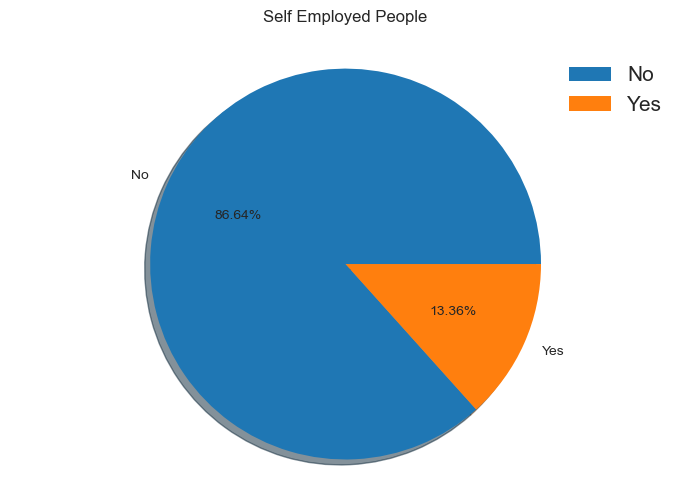

In [18]:
plt.style.use('seaborn-white')
plt.figure(figsize=(7,5))
plt.pie(df['Self_Employed'].value_counts(), labels=df['Self_Employed'].value_counts().index, shadow=True, autopct='%1.2f%%')
plt.title('Self Employed People\n')
plt.legend(prop={'size':15})
plt.axis('equal')
plt.tight_layout()
plt.show()

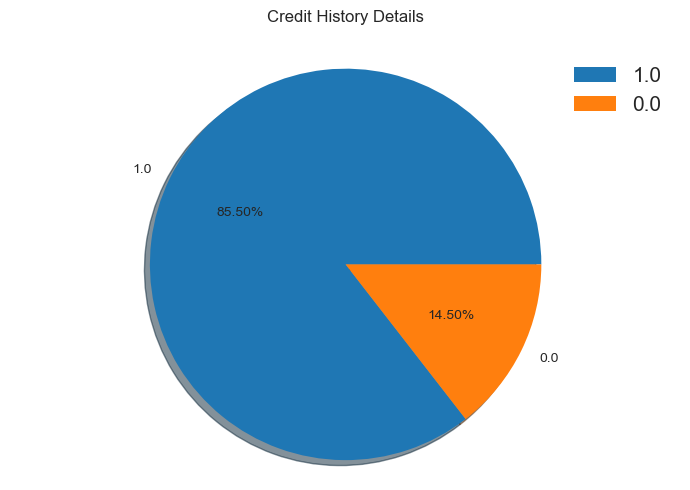

In [19]:
plt.style.use('seaborn-white')
plt.figure(figsize=(7,5))
plt.pie(df['Credit_History'].value_counts(), labels=df['Credit_History'].value_counts().index, shadow=True, autopct='%1.2f%%')
plt.title('Credit History Details\n')
plt.legend(prop={'size':15})
plt.axis('equal')
plt.tight_layout()
plt.show()

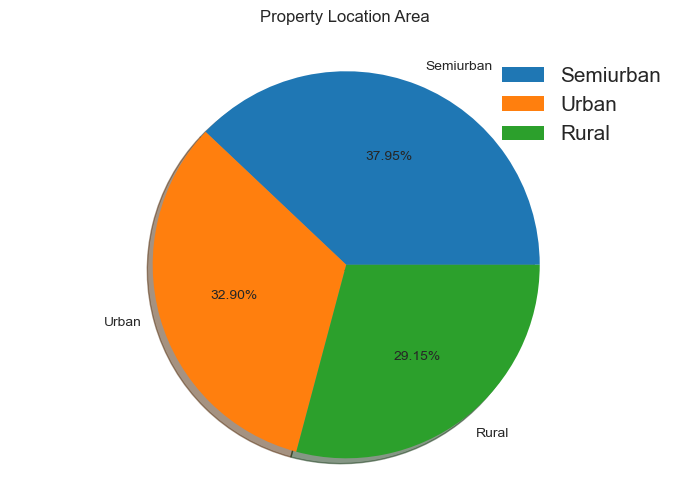

In [20]:
plt.style.use('seaborn-white')
plt.figure(figsize=(7,5))
plt.pie(df['Property_Area'].value_counts(), labels=df['Property_Area'].value_counts().index, shadow=True, autopct='%1.2f%%')
plt.title('Property Location Area\n')
plt.legend(prop={'size':15})
plt.axis('equal')
plt.tight_layout()
plt.show()

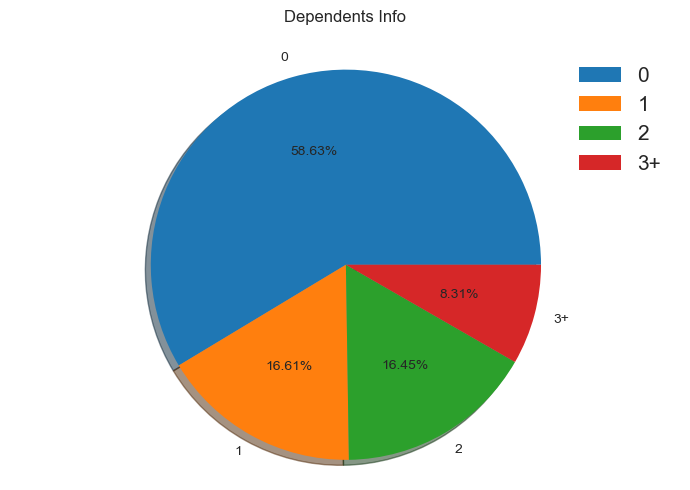

In [21]:
plt.style.use('seaborn-white')
plt.figure(figsize=(7,5))
plt.pie(df['Dependents'].value_counts(), labels=df['Dependents'].value_counts().index, shadow=True, autopct='%1.2f%%')
plt.title('Dependents Info\n')
plt.legend(prop={'size':15})
plt.axis('equal')
plt.tight_layout()
plt.show()

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


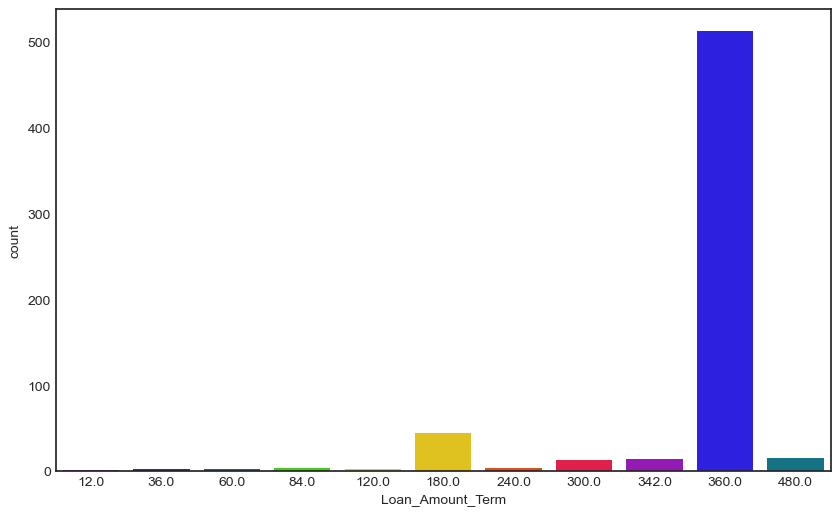

In [25]:
try:
    plt.figure(figsize=(10,6))
    col_name='Loan_Amount_Term'
    values=df[col_name].value_counts()
    index=0
    ax=sns.countplot(df[col_name], palette="prism")
    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], horizontalalignment="center", fontweight='bold', color='w')
        index+=1
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f" Number of rows")
    plt.show()
except Exception as e:
    pass

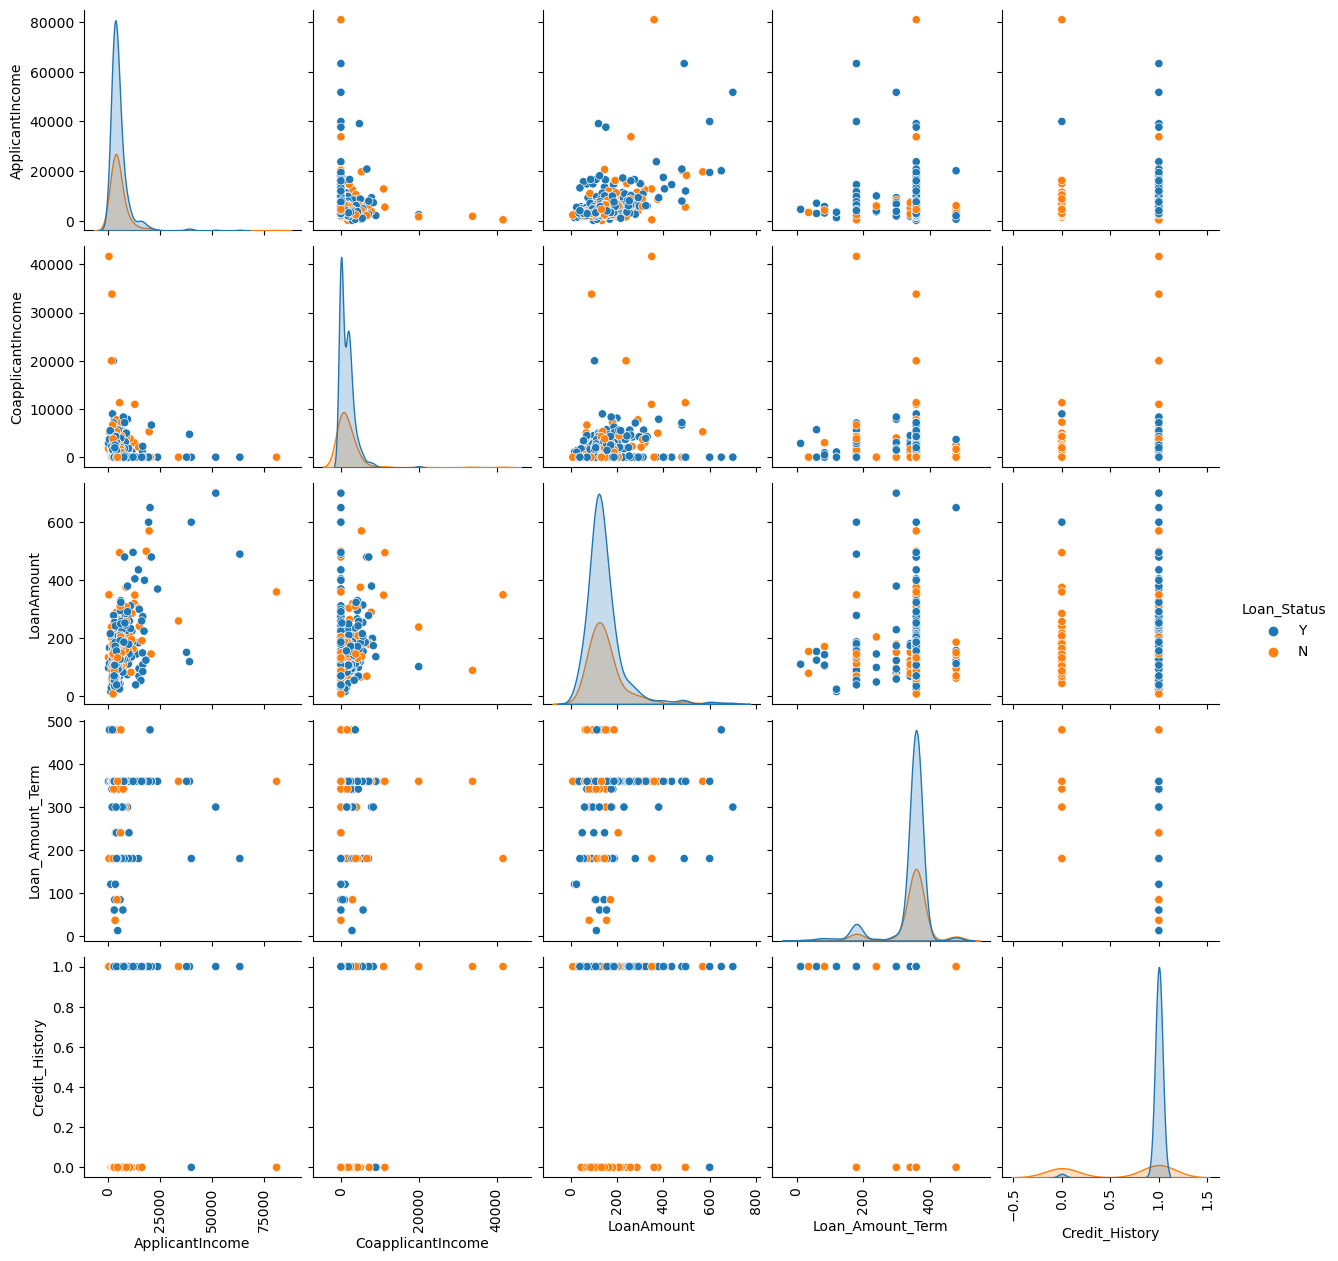

In [26]:
plt.style.use('default')
g=sns.pairplot(df,hue='Loan_Status', diag_kind="kde")
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

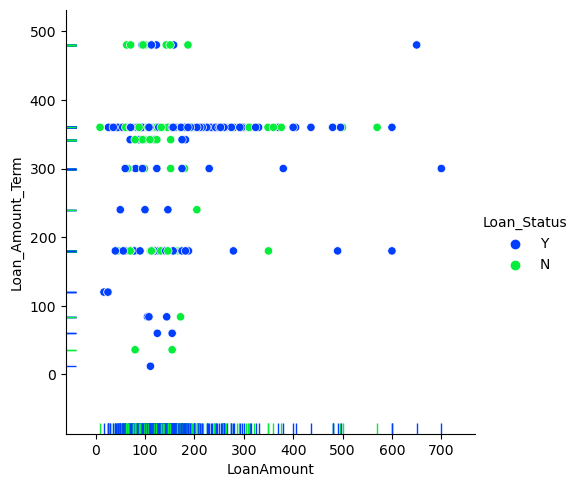

In [28]:
plt.style.use('seaborn-bright')
sns.relplot(data=df, x='LoanAmount', y='Loan_Amount_Term', hue='Loan_Status')
sns.rugplot(data=df, x='LoanAmount', y='Loan_Amount_Term', hue='Loan_Status', legend=False)

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

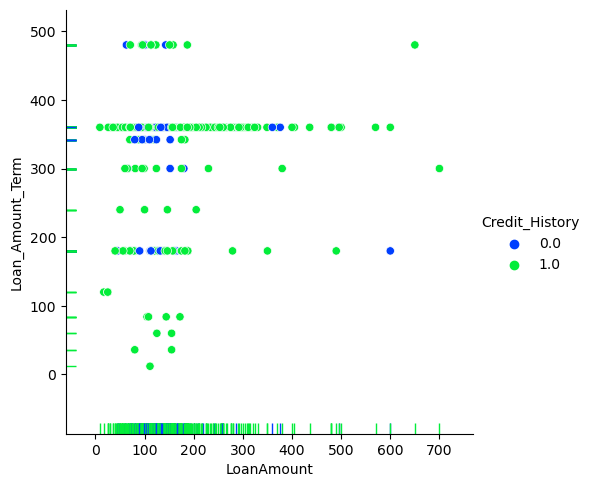

In [29]:
sns.relplot(data=df, x='LoanAmount', y='Loan_Amount_Term', hue='Credit_History')
sns.rugplot(data=df, x='LoanAmount', y='Loan_Amount_Term', hue='Credit_History', legend=False)

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

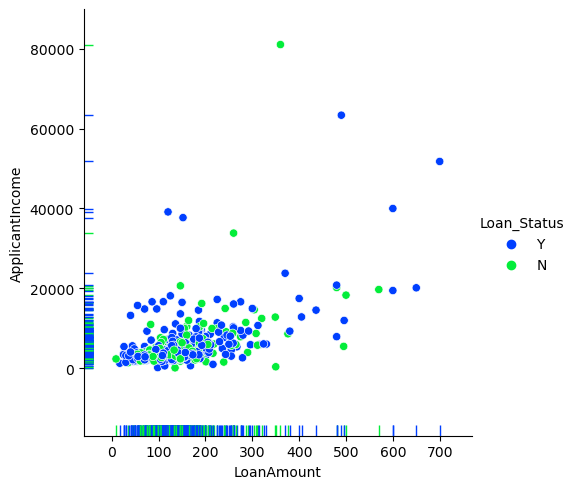

In [30]:
sns.relplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Loan_Status')
sns.rugplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Loan_Status', legend=False)

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

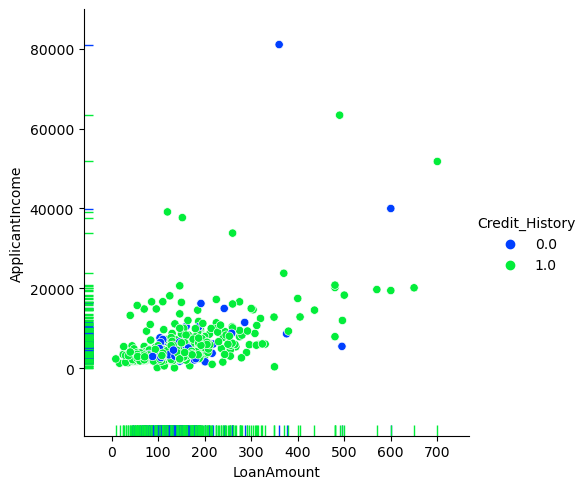

In [32]:
sns.relplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Credit_History')
sns.rugplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Credit_History', legend=False)

<AxesSubplot:xlabel='LoanAmount', ylabel='CoapplicantIncome'>

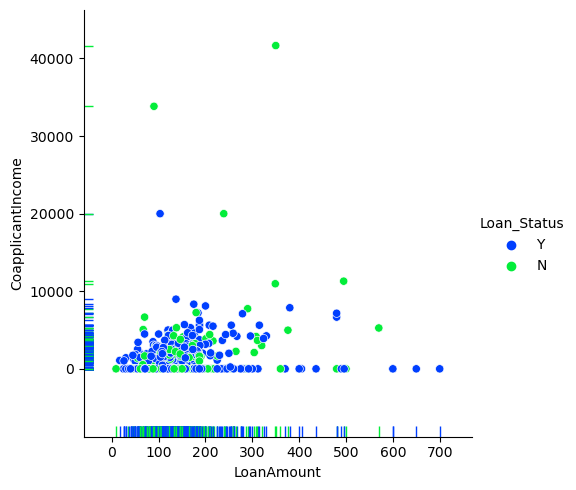

In [33]:
sns.relplot(data=df, x='LoanAmount', y='CoapplicantIncome', hue='Loan_Status')
sns.rugplot(data=df, x='LoanAmount', y='CoapplicantIncome', hue='Loan_Status', legend=False)

<AxesSubplot:xlabel='LoanAmount', ylabel='CoapplicantIncome'>

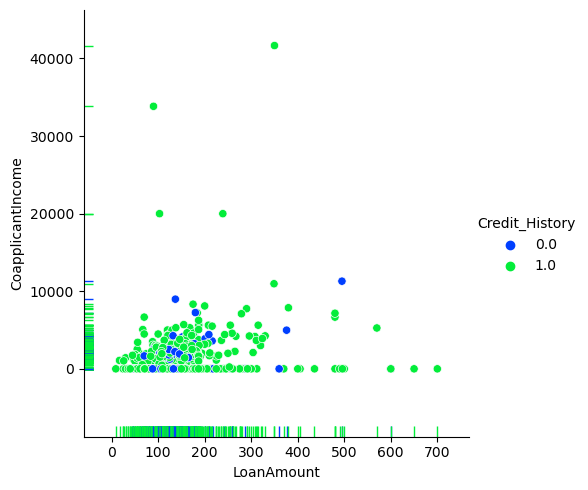

In [34]:
sns.relplot(data=df, x='LoanAmount', y='CoapplicantIncome', hue='Credit_History')
sns.rugplot(data=df, x='LoanAmount', y='CoapplicantIncome', hue='Credit_History', legend=False)

# ENCODING THE CATEGORICAL OBJECT DATATYPE COLUMNS

In [35]:
 #LABEL ENCODER

le=LabelEncoder()
df["Loan_Status"]=le.fit_transform(df["Loan_Status"])
df.sample(6)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
82,Female,Yes,2,Graduate,No,1378,1881.0,167.0,360.0,1.0,Urban,0
31,Male,No,0,Graduate,No,3167,0.0,74.0,360.0,1.0,Urban,0
249,Male,Yes,0,Graduate,No,1809,1868.0,90.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
519,Female,No,0,Not Graduate,No,3400,0.0,95.0,360.0,1.0,Rural,0
292,Male,Yes,2,Graduate,No,3153,1560.0,134.0,360.0,1.0,Urban,1


#By using Label encoder succesfully converted the object datatype in our "Loan_Status" column to a numerical format.

In [36]:
#ORDINAL ENCODER

oe=OrdinalEncoder()
df['Gender']=oe.fit_transform(df['Gender'].values.reshape(-1,1))
df['Married']=oe.fit_transform(df['Married'].values.reshape(-1,1))
df['Dependents']=oe.fit_transform(df['Dependents'].values.reshape(-1,1))
df['Education']=oe.fit_transform(df['Education'].values.reshape(-1,1))
df['Self_Employed']=oe.fit_transform(df['Self_Employed'].values.reshape(-1,1))
df['Property_Area']=oe.fit_transform(df['Property_Area'].values.reshape(-1,1))
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1


In [37]:
#checking the shape of the dataset after encoding

print(f"Shape of the dataset after encoding is", df.shape)

Shape of the dataset after encoding is (614, 12)


# CORRELATION USING HEATMAP

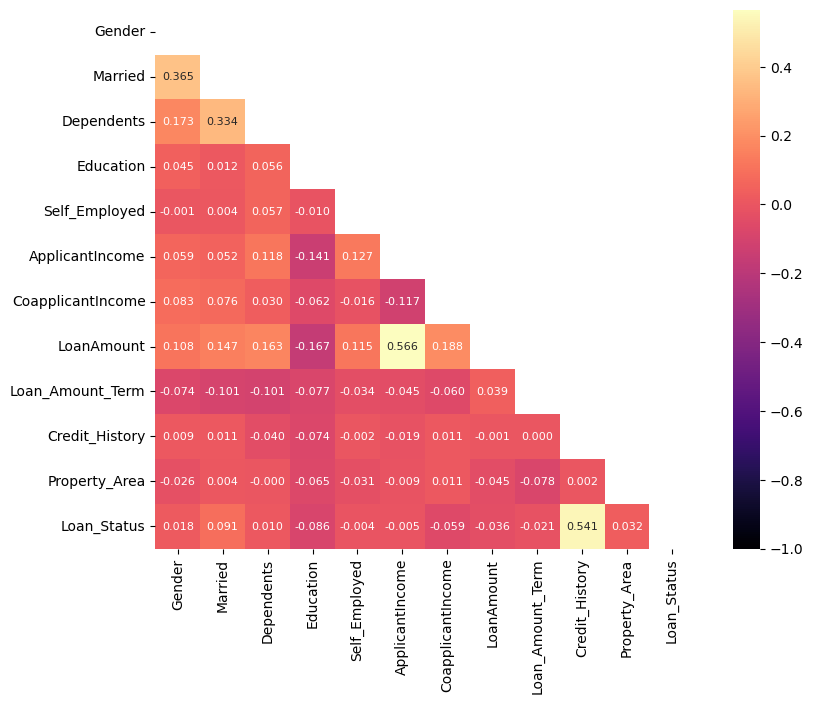

In [38]:
plt.style.use('seaborn-pastel')
upper_triangle=np.triu(df.corr())
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), vmin=-1, annot=True, square=True, fmt='0.3f',annot_kws={'size':8}, cmap='magma', mask=upper_triangle)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# USING ZSCORE TO REMOVE OUTLIERS

In [39]:
z=np.abs(zscore(df))
threshold=3
df1=df[(z<3).all(axis=1)]
print("Shape of the dataframe before removing outliers is : ",df.shape)
print("Shape of the dataframe after removing outliers is : ",df1.shape)
print("The %AGE of data lost after removing outlier is : ",(df.shape[0]-df1.shape[0])/df.shape[0]*100)
df=df1.copy()

Shape of the dataframe before removing outliers is :  (614, 12)
Shape of the dataframe after removing outliers is :  (577, 12)
The %AGE of data lost after removing outlier is :  6.026058631921824


There are columns present in our dataset that are above acceptable range of+-0.5 value.

# SPLITTING THE DATASET INTO 2 VARIABLES NAMELY X AND Y FOR FEATURE AND LABEL

In [41]:
X=df.drop('Loan_Status', axis=1)
Y=df['Loan_Status']

# RESOLVING THE CLASS IMBALANCE ISSUE IN LABEL COLUMN

In [42]:
Y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [43]:
#Adding samples to make all the categorical label values same
oversample=SMOTE()
X,Y=oversample.fit_resample(X,Y)

In [44]:
Y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

# FEATURE SCALING

In [45]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.516843,-1.363785,-0.768617,-0.607178,-0.405848,0.417670,-0.843614,0.184773,0.235243,0.588159,1.287523
1,0.516843,0.799641,0.280030,-0.607178,-0.405848,-0.025174,0.105516,-0.152669,0.235243,0.588159,-1.350273
2,0.516843,0.799641,-0.768617,-0.607178,2.758571,-0.578903,-0.843614,-1.288952,0.235243,0.588159,1.287523
3,0.516843,0.799641,-0.768617,1.814356,-0.405848,-0.724769,0.640504,-0.299286,0.235243,0.588159,1.287523
4,0.516843,-1.363785,-0.768617,-0.607178,-0.405848,0.470489,-0.843614,0.085584,0.235243,0.588159,1.287523


# FINDING BEST RANDOM STATE FOR BUILDING CLASSIFICATION MODELS

In [46]:
maxAccu=0
maxRS=0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred=lr.predict(X_test)
    accu_score=(accuracy_score(Y_test, pred))*100
    if accu_score>maxAccu:
        maxAccu=accu_score
        maxRS=i
        
print("The best accuracy score is", maxAccu, "at Random State", maxRS)

The best accuracy score is 82.91457286432161 at Random State 86


,Importance
Features,
Credit_History,0.308
ApplicantIncome,0.160
LoanAmount,0.130
CoapplicantIncome,0.087
Property_Area,0.066
Married,0.055
Dependents,0.051
Education,0.048
Loan_Amount_Term,0.043


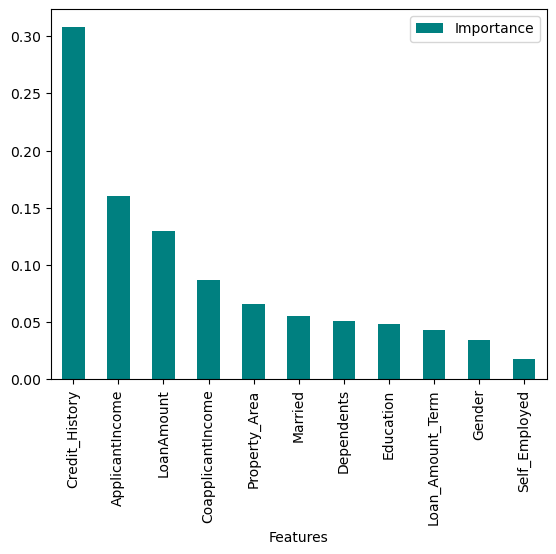

In [47]:
rf=RandomForestClassifier()
rf.fit(X_train, Y_train)
importance=pd.DataFrame({'Features':X.columns,'Importance':np.round(rf.feature_importances_,3)})
importance=importance.sort_values('Importance', ascending=False).set_index('Features')
importance.plot.bar(color='teal')
importance

# MACHINE LEARNING MODEL FOR CLASSIFICATION WITH EVALUATION METRICS

In [48]:
def classify(model, X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=53)
    
    model.fit(X_train, Y_train)
    pred=model.predict(X_test)
    
    accu_score=(accuracy_score(Y_test, pred))*100
    print("ACCURACY SCORE is= ", accu_score)
    
    class_report=classification_report(Y_test, pred)
    print("CLASSIFICATION REPORT is = ", class_report)
    
    cv_score=(cross_val_score(model, X,Y, cv=5).mean())*100
    print("Cross Validation Score is = ", cv_score)
    
    result=accu_score-cv_score
    print("Accuracy score - Cross validation score is= ", result)

In [49]:
#LOGISTIC REGRESSION MODEL
model=LogisticRegression()
classify(model,X,Y)

ACCURACY SCORE is=  77.88944723618091
CLASSIFICATION REPORT is =                precision    recall  f1-score   support

           0       0.87      0.66      0.75        99
           1       0.73      0.90      0.80       100

    accuracy                           0.78       199
   macro avg       0.80      0.78      0.78       199
weighted avg       0.80      0.78      0.78       199

Cross Validation Score is =  76.51650943396227
Accuracy score - Cross validation score is=  1.3729378022186438


In [50]:
#SUPPORT VECTOR CLASSIFIER

model=SVC(C=1.0 ,random_state=966,kernel='rbf', gamma='auto')
classify(model, X, Y)

ACCURACY SCORE is=  79.89949748743719
CLASSIFICATION REPORT is =                precision    recall  f1-score   support

           0       0.87      0.70      0.78        99
           1       0.75      0.90      0.82       100

    accuracy                           0.80       199
   macro avg       0.81      0.80      0.80       199
weighted avg       0.81      0.80      0.80       199

Cross Validation Score is =  77.39465408805032
Accuracy score - Cross validation score is=  2.5048433993868713


In [51]:
#DECISION TREE CLASSIFIER

model=DecisionTreeClassifier(random_state=26, max_depth=15)
classify(model,X,Y)

ACCURACY SCORE is=  80.90452261306532
CLASSIFICATION REPORT is =                precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.82      0.79      0.81       100

    accuracy                           0.81       199
   macro avg       0.81      0.81      0.81       199
weighted avg       0.81      0.81      0.81       199

Cross Validation Score is =  79.40723270440252
Accuracy score - Cross validation score is=  1.4972899086628075


In [56]:
#RANDOM FOREST CLASSIFIER
model=RandomForestClassifier(max_depth=15, random_state=86)
classify(model,X,Y)

ACCURACY SCORE is=  87.93969849246231
CLASSIFICATION REPORT is =                precision    recall  f1-score   support

           0       0.89      0.87      0.88        99
           1       0.87      0.89      0.88       100

    accuracy                           0.88       199
   macro avg       0.88      0.88      0.88       199
weighted avg       0.88      0.88      0.88       199

Cross Validation Score is =  84.56367924528303
Accuracy score - Cross validation score is=  3.3760192471792863


In [70]:
#EXTRA TREES CLASSIFIER

model=ExtraTreesClassifier()
classify(model,X,Y)

ACCURACY SCORE is=  87.93969849246231
CLASSIFICATION REPORT is =                precision    recall  f1-score   support

           0       0.89      0.86      0.88        99
           1       0.87      0.90      0.88       100

    accuracy                           0.88       199
   macro avg       0.88      0.88      0.88       199
weighted avg       0.88      0.88      0.88       199

Cross Validation Score is =  83.68238993710693
Accuracy score - Cross validation score is=  4.2573085553553796


# HYPER PARAMETER TUNING ON THE BEST ML MODEL

In [73]:
#CHOOSING EXTRATREESCLASSIFIER

fmod_params={'criterion':["gini","entropy"],
            'n_jobs':[-2,-1,1],
            'max_depth':[10,15,20],
            'random_state':[53,953,1000],
            'n_estimators':[100,200,300]}

In [74]:
GSCV=GridSearchCV(ExtraTreesClassifier(),fmod_params, cv=5)
GSCV.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20],
                         'n_estimators': [100, 200, 300], 'n_jobs': [-2, -1, 1],
                         'random_state': [53, 953, 1000]})

In [75]:
GSCV.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 953}

In [76]:
Final_Model=ExtraTreesClassifier(criterion="gini", max_depth=15, n_estimators=100, n_jobs=-2, random_state=953)
Classifier=Final_Model.fit(X_train, Y_train)
fmod_pred=Final_Model.predict(X_test)
fmod_acc=(accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the best model is= ", fmod_acc)

Accuracy score for the best model is=  85.92964824120602


# SAVING THE MODEL

In [81]:
filename="Final_Model.pkl"
joblib.dump(Final_Model, filename)

['Final_Model.pkl']

FINALLY SAVING THE BEST CLASSIFICATION MODEL. 

# >>>>>>>DONE<<<<<<<